In [1]:
import os
import numpy as np
import cv2
import gc

In [4]:
data = np.load('../2_machine_learning/data_preprocess.npz')

In [5]:
X = data['arr_0']
y = data['arr_1']

In [6]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

In [7]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [9]:
y_array = y_onehot.toarray()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

In [17]:
cv2.imshow('image',x_train[0])
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [19]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

C:\Users\kuhya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 192)                 │       1,769,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │           5,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             116 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,798,768 (6.86 MB)

 Trainable params: 1,798,768 (6.86 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8389 - loss: 0.4186 - val_accuracy: 0.9699 - val_loss: 0.0964
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9727 - loss: 0.0831 - val_accuracy: 0.9744 - val_loss: 0.0716
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9793 - loss: 0.0581 - val_accuracy: 0.9799 - val_loss: 0.0540
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9905 - loss: 0.0278 - val_accuracy: 0.9854 - val_loss: 0.0522
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9924 - loss: 0.0209 - val_accuracy: 0.9854 - val_loss: 0.0436
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9943 - loss: 0.0156 - val_accuracy: 0.9799 - val_loss: 0.0641
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9935 - loss: 0.0185 - val_accuracy: 0.9905 - val_loss: 0.0289
Epoch 8/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9989 - loss: 0.0048 - 

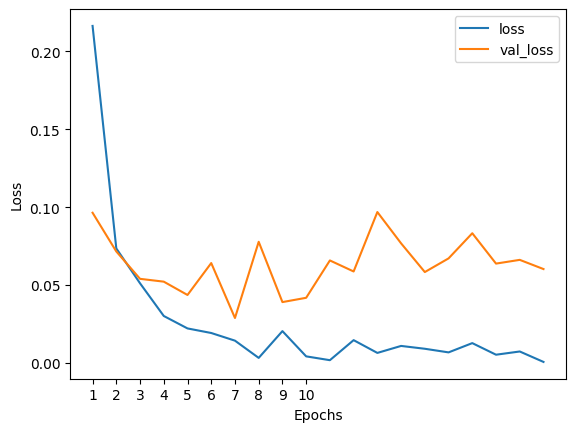

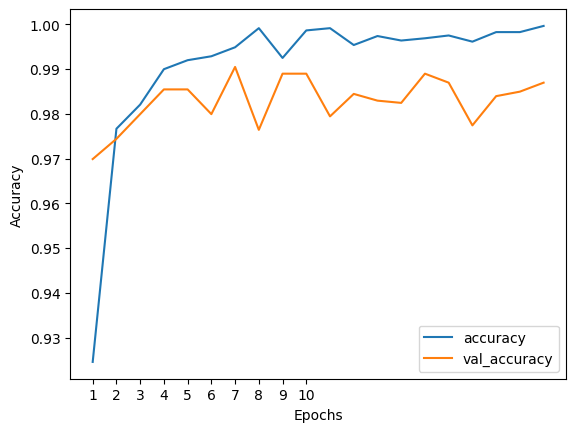

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()


In [24]:
model.save('face_cnn_model.keras')


In [25]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]